## Exercise: Read DWD Radolan Binary Data Product using Xarray

In the exercise, we show a short example on how to read DWD binary data product "RADOLAN" into a netCDF-like format using Xarray.
The data used in this example can be downloaded [here](https://opendata.dwd.de/weather/radar/radolan/sf/).

In [1]:
import os
from glob import glob
import wget
import numpy as np
import xarray as xr
import wradlib as wrl
import matplotlib.pyplot as plt

In [2]:
# Set Working Directory; Please change it to your file path.
os.chdir('/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/radolan')
os.getcwd()

'/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/radolan'

In [3]:
# URL of the source Binary data
url = "https://opendata.dwd.de/weather/radar/radolan/sf/raa01-sf_10000-2406042350-dwd---bin.bz2"

# Download the Binary data 
filename = wget.download(url, out=os.path.join(os.getcwd()))

In [4]:
# You need to unzip the downloaded data.
# After unzipping, get the file path to the unzipped data.
fpath = glob(os.path.join(os.getcwd(), "*bin"))
fpath

['/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/radolan/raa01-sf_10000-2406042350-dwd---bin']

In [5]:
# Read the RADOLAN Binary file with xarray built-in function, 
# xarray.open_dataset(..., engine='radolan')
ds = xr.open_dataset(fpath[0], engine='radolan', decode_times=False)
ds

TRIG


/Users/icdc/Documents/NFDI/Kemeng/myenv/venvNetcdf/lib/python3.12/site-packages/xarray/conventions.py:440: SerializationWarning: variable 'SF' has multiple fill values {2490, 2500, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset> Size: 3MB
Dimensions:  (y: 900, x: 900, time: 1)
Coordinates:
  * time     (time) float64 8B 1.718e+09
  * y        (y) float64 7kB -4.658e+03 -4.657e+03 ... -3.76e+03 -3.759e+03
  * x        (x) float64 7kB -523.0 -522.0 -521.0 -520.0 ... 374.0 375.0 376.0
Data variables:
    SF       (y, x) float32 3MB ...
Attributes:
    radarid:         10000
    formatversion:   3
    radolanversion:  2.29.1
    radarlocations:  ['asb', 'boo', 'ros', 'hnr', 'umd', 'pro', 'ess', 'fld',...
    radardays:       ['asb 24', 'boo 24', 'drs 24', 'eis 24', 'ess 24', 'fbg ...

In [6]:
# Create RADOLAN grid in wgs84
radolan_grid = wrl.georef.get_radolan_grid(nrows = ds.sizes['y'], 
                                           ncols = ds.sizes['x'],
                                           wgs84 = True,
                                           mode = "radolan")
#radolan_grid

# Assign Longitude and Latitude from X and Y
dsg = ds.assign_coords({"lon": (["y", "x"], radolan_grid[..., 0]),
                        "lat": (["y", "x"], radolan_grid[..., 1])})
dsg.info()

xarray.Dataset {
dimensions:
	y = 900 ;
	x = 900 ;
	time = 1 ;

variables:
	float32 SF(y, x) ;
		SF:valid_min = 0 ;
		SF:valid_max = 4095 ;
		SF:standard_name = rainfall_amount ;
		SF:long_name = SF ;
		SF:unit = mm ;
	float64 time(time) ;
		time:standard_name = time ;
		time:units = seconds since 1970-01-01T00:00:00Z ;
	float64 y(y) ;
		y:units = m ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
	float64 x(x) ;
		x:units = m ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
	float64 lon(y, x) ;
	float64 lat(y, x) ;

// global attributes:
	:radarid = 10000 ;
	:formatversion = 3 ;
	:radolanversion = 2.29.1 ;
	:radarlocations = ['asb', 'boo', 'ros', 'hnr', 'umd', 'pro', 'ess', 'fld', 'drs', 'neu', 'nhb', 'oft', 'eis', 'tur', 'isn', 'fbg', 'mem'] ;
	:radardays = ['asb 24', 'boo 24', 'drs 24', 'eis 24', 'ess 24', 'fbg 24', 'fld 24', 'hnr 24', 'isn 24', 'mem 24', 'neu 24', 'nhb 24', 'oft 24', 'pro 24', '

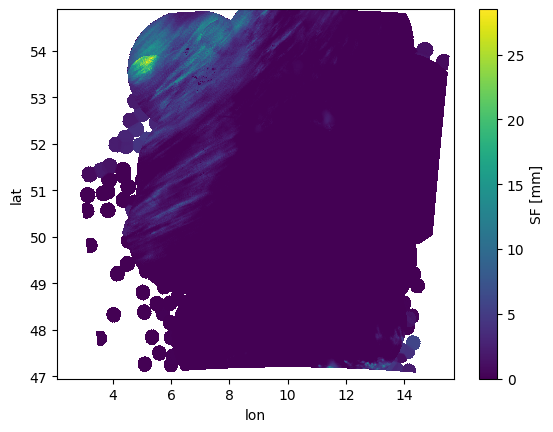

In [7]:
# Simple plot in lat-lon-space
dsg.SF.plot(x = "lon", y = "lat")